In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('star_dataset.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


## 1. Consider three nominal features
One of them, not more, may be taken from nominal features in your data

In [17]:
# Numerical features
num_features = [
    'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'
]

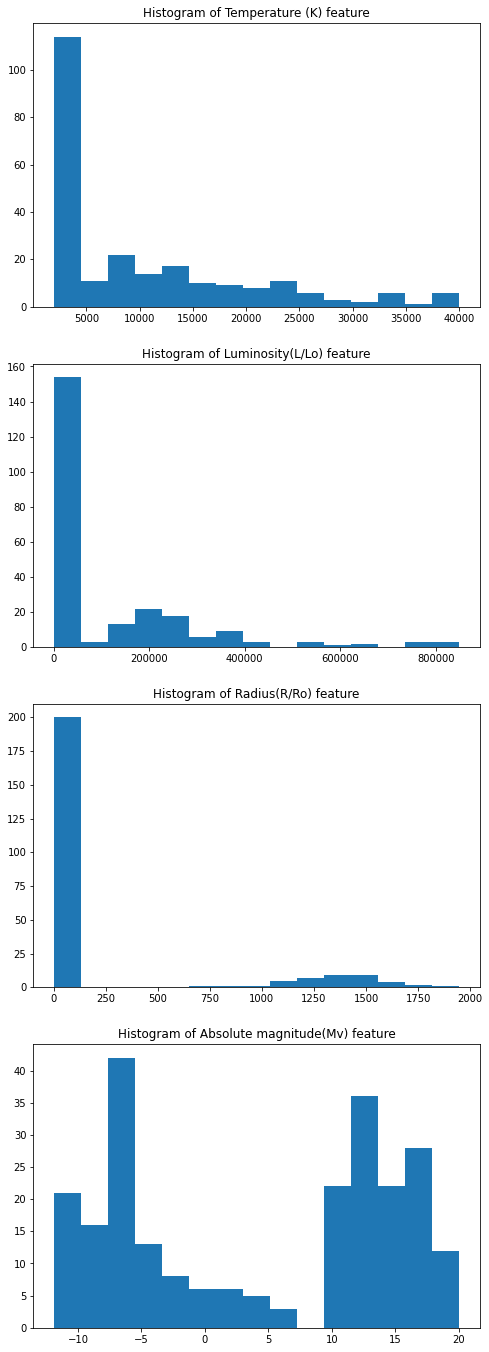

In [27]:
fig, axs = plt.subplots(len(num_features), figsize=(8, 24))
for i, feature in enumerate(num_features):
    axs[i].hist(df[feature], int(np.round(np.sqrt(df.shape[0]))))
    axs[i].set_title('Histogram of %s feature' % feature)

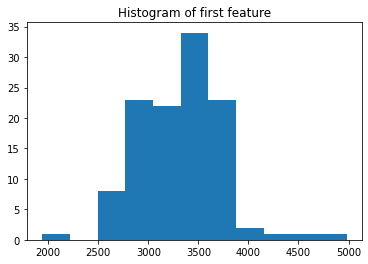

In [55]:
temperature = df['Temperature (K)']
temperature_limit = temperature[temperature < 5000]

plt.hist(temperature_limit, int(np.round(np.sqrt(temperature_limit.shape[0]))))
plt.title("Histogram of temperature feature")
plt.show()

In [57]:
def get_block(value, blocks_limit):
    for i, x in enumerate(blocks_limit):
        if value < x:
            return i
    return 0

In [87]:
temperature_blocks_limit = [3000, 3500, 4500, 10000, 15000, 40000]
df['Temperature_block'] = df['Temperature (K)'].apply(lambda x: get_block(x, temperature_blocks_limit))

In [88]:
absolute_magnitude_blocks_limit = [-10, -5, 5, 12, 15, 20]
df['Absolute_magnitude_blocks'] = df['Absolute magnitude(Mv)'].apply(lambda x: get_block(x, absolute_magnitude_blocks_limit))

We choose three features: `Star type`, `Temperature` and `Absolute magnitude`. 

`Temperature` and `Absolute magnitude` were splited on 6 blocks and we will use them as nominal features.

In [89]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Temperature_block,Absolute_magnitude_blocks
0,3068,0.002400,0.1700,16.12,0,Red,M,1,5
1,3042,0.000500,0.1542,16.60,0,Red,M,1,5
2,2600,0.000300,0.1020,18.70,0,Red,M,0,5
3,2800,0.000200,0.1600,16.65,0,Red,M,0,5
4,1939,0.000138,0.1030,20.06,0,Red,M,0,0
...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O,5,1
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O,5,0
237,8829,537493.000000,1423.0000,-10.73,5,White,A,3,0
238,9235,404940.000000,1112.0000,-11.23,5,White,A,3,0


In [92]:
features = ['Star type', 'Temperature_block', 'Absolute_magnitude_blocks']

for feature in features:
    counts = df[feature].value_counts()
    print(counts)
    print()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

5    59
1    45
2    39
3    36
0    31
4    30
Name: Temperature_block, dtype: int64

1    61
4    48
5    38
3    37
2    35
0    21
Name: Absolute_magnitude_blocks, dtype: int64



## 2. Build two contingency tables over them
Present a conditional frequency table and Quetelet relative index tables. Make comments on relations between categories of the common (to both tables) feature and two others.

In [265]:
_TOTAL_COL = 'total'

def _number_of_blocks(feature):
    return df[feature].max() + 1

def make_contingency_table(feature_1, feature_2):
    table = {}

    # Count frequency
    for _, row in df.iterrows():
        f1 = row[feature_1]
        if not f1 in table:
            table[f1] = {}
        f2 = row[feature_2]
        if not f2 in table[f1]:
            table[f1][f2] = 0
        table[f1][f2] += 1

    # Sum total
    table[_TOTAL_COL] = {}
    table[_TOTAL_COL][_TOTAL_COL] = 0
    for x in range(_number_of_blocks(feature_1)):
        if not x in table:
            table[x] = {}
        table[x][_TOTAL_COL] = 0

        for y in range(_number_of_blocks(feature_2)):
            if not y in table[x]:
                table[x][y] = 0
            if not y in table[_TOTAL_COL]:
                table[_TOTAL_COL][y] = 0

            table[_TOTAL_COL][y] += table[x][y]
            table[x][_TOTAL_COL] += table[x][y]

        table[_TOTAL_COL][_TOTAL_COL] += table[x][_TOTAL_COL]

    contingency_df = pd.DataFrame.from_dict(table)
    return contingency_df.sort_index(key=lambda x: list(map(str, x)))

def calc_prob(contingency_df):
    total = contingency_df[_TOTAL_COL][_TOTAL_COL]
    return contingency_df / total

def conditional_prob(contingency_df):
    df_ = contingency_df \
        .drop(_TOTAL_COL, axis=0)\
        .drop(_TOTAL_COL, axis=1)
    return (df_ / contingency_df.loc[_TOTAL_COL])\
            .drop(_TOTAL_COL, axis=1)

def quetelet_index(conditional_df, df_):
    return np.subtract(
             np.divide(conditional_df,
                 df_[_TOTAL_COL][:-1] / df.shape[0]
             ), 
             1
    )

## Contingency tables

Table for feature `Star type` and `Temperature`

In [244]:
type_temperature = make_contingency_table('Star type', 'Temperature_block')
print('Frequency table')
type_temperature

Frequency table


,0,1,2,3,4,5,total
0,24,6,0,0,1,0,31
1,13,23,0,0,4,5,45
2,3,11,0,1,5,19,39
3,0,0,11,16,6,3,36
4,0,0,15,6,7,2,30
5,0,0,14,17,17,11,59
total,40,40,40,40,40,40,240


In [245]:
type_temperature_prob = calc_prob(type_temperature)
print('Probability table')
type_temperature_prob

Probability table


,0,1,2,3,4,5,total
0,0.100000,0.025000,0.000000,0.000000,0.004167,0.000000,0.129167
1,0.054167,0.095833,0.000000,0.000000,0.016667,0.020833,0.187500
2,0.012500,0.045833,0.000000,0.004167,0.020833,0.079167,0.162500
3,0.000000,0.000000,0.045833,0.066667,0.025000,0.012500,0.150000
4,0.000000,0.000000,0.062500,0.025000,0.029167,0.008333,0.125000
5,0.000000,0.000000,0.058333,0.070833,0.070833,0.045833,0.245833
total,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.000000


Table for feature `Star type` and `Absolute magnitude`

In [246]:
type_magnitude = make_contingency_table('Star type', 'Absolute_magnitude_blocks')
print('Frequency table')
type_magnitude

Frequency table


,0,1,2,3,4,5,total
0,2,0,0,0,0,19,21
1,0,0,0,0,40,21,61
2,0,0,0,35,0,0,35
3,0,17,15,5,0,0,37
4,0,23,25,0,0,0,48
5,38,0,0,0,0,0,38
total,40,40,40,40,40,40,240


In [247]:
type_magnitude_prob = calc_prob(type_magnitude)
print('Probability table')
type_magnitude_prob

Probability table


,0,1,2,3,4,5,total
0,0.008333,0.000000,0.000000,0.000000,0.000000,0.079167,0.087500
1,0.000000,0.000000,0.000000,0.000000,0.166667,0.087500,0.254167
2,0.000000,0.000000,0.000000,0.145833,0.000000,0.000000,0.145833
3,0.000000,0.070833,0.062500,0.020833,0.000000,0.000000,0.154167
4,0.000000,0.095833,0.104167,0.000000,0.000000,0.000000,0.200000
5,0.158333,0.000000,0.000000,0.000000,0.000000,0.000000,0.158333
total,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.000000


### Conditional Probabilities

Table for feature `Star type` and `Temperature`

In [253]:
conditional_type_temperature = conditional_prob(type_temperature)
conditional_type_temperature

,0,1,2,3,4,5
0,0.600,0.150,0.000,0.000,0.025,0.000
1,0.325,0.575,0.000,0.000,0.100,0.125
2,0.075,0.275,0.000,0.025,0.125,0.475
3,0.000,0.000,0.275,0.400,0.150,0.075
4,0.000,0.000,0.375,0.150,0.175,0.050
5,0.000,0.000,0.350,0.425,0.425,0.275


Table for feature `Star type` and `Absolute magnitude`

In [254]:
conditional_type_magnitude = conditional_prob(type_magnitude)
conditional_type_magnitude

,0,1,2,3,4,5
0,0.05,0.000,0.000,0.000,0.0,0.475
1,0.00,0.000,0.000,0.000,1.0,0.525
2,0.00,0.000,0.000,0.875,0.0,0.000
3,0.00,0.425,0.375,0.125,0.0,0.000
4,0.00,0.575,0.625,0.000,0.0,0.000
5,0.95,0.000,0.000,0.000,0.0,0.000


In [266]:
quetelet_type_temperature = quetelet_index(conditional_type_temperature, type_temperature)
quetelet_type_temperature

,0,1,2,3,4,5
0,3.645161,-0.200000,-1.000000,-1.000000,-0.8,-1.000000
1,1.516129,2.066667,-1.000000,-1.000000,-0.2,-0.491525
2,-0.419355,0.466667,-1.000000,-0.833333,0.0,0.932203
3,-1.000000,-1.000000,0.692308,1.666667,0.2,-0.694915
4,-1.000000,-1.000000,1.307692,0.000000,0.4,-0.796610
5,-1.000000,-1.000000,1.153846,1.833333,2.4,0.118644


In [267]:
quetelet_type_magnitude = quetelet_index(conditional_type_magnitude, type_magnitude)
quetelet_type_magnitude

,0,1,2,3,4,5
0,-0.428571,-1.000000,-1.000000,-1.000000,-1.0,2.000000
1,-1.000000,-1.000000,-1.000000,-1.000000,4.0,2.315789
2,-1.000000,-1.000000,-1.000000,4.675676,-1.0,-1.000000
3,-1.000000,0.672131,1.571429,-0.189189,-1.0,-1.000000
4,-1.000000,1.262295,3.285714,-1.000000,-1.0,-1.000000
5,9.857143,-1.000000,-1.000000,-1.000000,-1.0,-1.000000


## 3. Compute and visualize the chi-square average-Quetelet-index over both tables. 
Comment on the meaning of the values in the data analysis context.

In [281]:
def avg_quetelet_index(prob_freq_df, quetelet_df):
    prob_freq_df_ = prob_freq_df \
        .drop(_TOTAL_COL, axis=0)\
        .drop(_TOTAL_COL, axis=1)

    return np.sum(prob_freq_df_.to_numpy().reshape(1, -1) * quetelet_df.to_numpy().reshape(1, -1))

def chi2(prob_freq_df, quetelet_df):
    prob_freq_df_ = prob_freq_df \
        .drop(_TOTAL_COL, axis=0)\
        .drop(_TOTAL_COL, axis=1)

    d = np.subtract(prob_freq_df_, quetelet_df).to_numpy()
    dd = np.power(d, 2)
    chi =  np.divide(dd, quetelet_df)
    return np.sum(chi)

In [282]:
ave_quet_idx = avg_quetelet_index(type_temperature_prob, quetelet_type_temperature)
ave_quet_idx

1.3077838410602218

In [283]:
chi2(type_temperature_prob, quetelet_type_temperature)

<ipython-input-281-1a52cfc2eef5>:15: RuntimeWarning: divide by zero encountered in true_divide
  chi =  np.divide(dd, quetelet_df)


0    1.412908
1   -0.994180
2   -0.170517
3         inf
4         inf
5   -2.242303
dtype: float64